# Kaggle competition Titanic
prediction of survival of passengers

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [50]:
data = pd.read_csv('train.csv')
data.head()
#pcclass = ticket Class 1 = 1st, 2 = 2nd, 3 = 3rd
# sibsp = number of siblings / spouses aboard the Titanic
# parch = number of parents / children aboard the Titanic
# Embarked = port of embarktion C = Cherbourg, Q = Queenstown, S = Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
print(data.shape)

(891, 12)


In [52]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin has to many na values, will be dropped

Visualisation to check what to do with NaN values in the Age column

Text(0.5, 1.0, 'histogramm of Ages with Nan filled with Ffill')

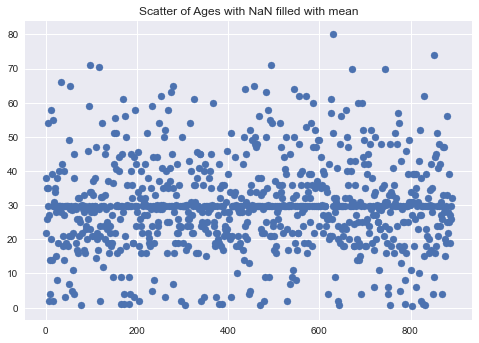

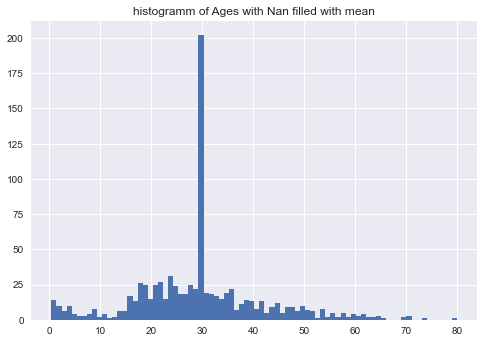

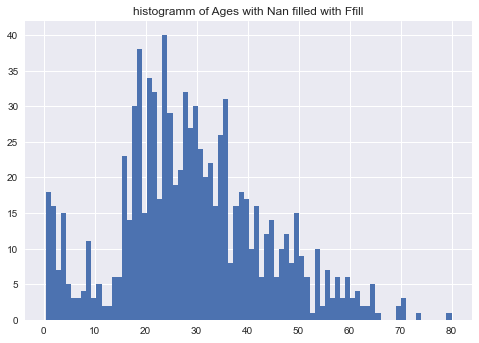

In [53]:
plt.scatter(range(len(data)), data.Age.fillna(data.Age.mean()));
ax = plt.gca()
ax.set_title('Scatter of Ages with NaN filled with mean')
plt.figure()
plt.hist(data.Age.fillna(data.Age.mean()), bins = 80);
ax = plt.gca()
ax.set_title('histogramm of Ages with Nan filled with mean')
plt.figure()
plt.hist(data.Age.fillna(method = 'ffill'), bins = 80);
ax = plt.gca()
ax.set_title('histogramm of Ages with Nan filled with Ffill')

#### First to drop all Age Nan values and see the result of classification

In [54]:
del data['Cabin']

In [55]:
data.dropna(inplace = True)
data.shape

(712, 11)

In [56]:
data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,712.000000,712.000000,712.000000,712,712,712.000000,712.000000,712.000000,712,712.000000,712
unique,NaN,NaN,NaN,712,2,NaN,NaN,NaN,541,NaN,3
top,NaN,NaN,NaN,"Beane, Mr. Edward",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,554
mean,448.589888,0.404494,2.240169,NaN,NaN,29.642093,0.514045,0.432584,NaN,34.567251,NaN
std,258.683191,0.491139,0.836854,NaN,NaN,14.492933,0.930692,0.854181,NaN,52.938648,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,222.750000,0.000000,1.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,8.050000,NaN
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.645850,NaN
75%,677.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.000000,NaN


In [59]:
data['Sex_cat'] = data.Sex.astype('category').cat.codes
data['Embarked_cat'] = data.Embarked.astype('category').cat.codes
sex_ecode = {1 : 'male', 0: 'female'}
#data.set_index('PassengerId');

In [60]:
columns_not_including = ['Name', 'Ticket', 'Embarked', 'Sex', 'PassengerId']
data = data.drop(columns_not_including, axis = 1)

In [61]:
y = data['Survived']
X = data.drop('Survived', axis = 1)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## Check Correlation among Features

In [299]:
import seaborn as sns

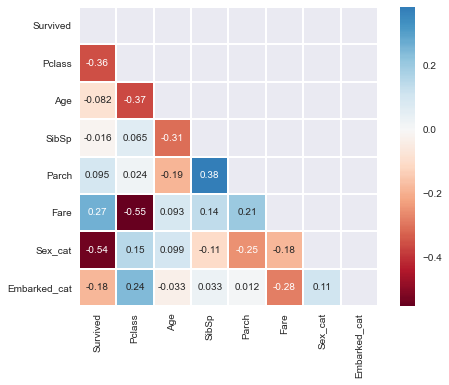

In [304]:
mask = np.triu(data.corr())
sns.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', 
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)

## Training ML model

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.81      0.81      0.81        85
           1       0.72      0.72      0.72        58

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X, y, cv = 10, scoring = 'accuracy')

array([0.68055556, 0.75      , 0.76056338, 0.83098592, 0.85915493,
       0.78873239, 0.8028169 , 0.78873239, 0.8028169 , 0.87323944])

## Grid Search with Random Forest

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [10, 40, 100, 300, 500], 'n_estimators': [50, 100, 200, 300, 500]}
rf_grid = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, cv = 3, verbose = 1)

In [68]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   38.0s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 40, 100, 300, 500],
                         'n_estimators': [50, 100, 200, 300, 500]},
             verbose=1)

In [69]:
grid_search.best_params_

{'max_depth': 300, 'n_estimators': 50}

In [70]:
best_grid = grid_search.best_estimator_

In [71]:
y_pred_best_grid = best_grid.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred_best_grid, target_names=['not 1', '1']))
print(classification_report(y_test, y_pred_rf, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.80      0.78      0.79        85
           1       0.68      0.71      0.69        58

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143

              precision    recall  f1-score   support

       not 1       0.81      0.81      0.81        85
           1       0.72      0.72      0.72        58

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



### normalizing data

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Sklearn Neural Network

In [141]:
from sklearn.neural_network import MLPClassifier

mlpreg = MLPClassifier(hidden_layer_sizes = [100,100],
                             activation = 'relu',
                             alpha = 0.001,
                             solver = 'adam').fit(X_train_scaled, y_train)
y_pred_mlpreg = mlpreg.predict(X_test_scaled)

C:\Users\Tola\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [142]:
print(classification_report(y_test, y_pred_mlpreg, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.55      0.86      0.67        78
           1       0.48      0.15      0.23        65

    accuracy                           0.54       143
   macro avg       0.51      0.51      0.45       143
weighted avg       0.52      0.54      0.47       143



## Classification with Tensorflow

In [73]:
import tensorflow as tf

In [101]:
dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))

In [110]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 1.     40.      0.      0.     27.7208  1.      0.    ], Target: 0
Features: [ 3. 16.  2.  0. 18.  1.  2.], Target: 0
Features: [ 2. 24.  0.  0. 13.  1.  2.], Target: 0
Features: [ 3.   24.    0.    0.    8.85  0.    2.  ], Target: 0
Features: [  1.     18.      2.      2.    262.375   0.      0.   ], Target: 1


In [129]:
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

In [130]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1024, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_arr, epochs = 50, verbose = 1, validation_data = (X_test_scaled, y_test_arr))

Train on 569 samples, validate on 143 samples
Epoch 1/50
569/569 [==============================] - 1s 2ms/sample - loss: 0.6810 - accuracy: 0.5835 - val_loss: 0.6955 - val_accuracy: 0.5245
Epoch 2/50
569/569 [==============================] - 0s 407us/sample - loss: 0.6728 - accuracy: 0.6239 - val_loss: 0.7039 - val_accuracy: 0.5455
Epoch 3/50
569/569 [==============================] - 0s 419us/sample - loss: 0.6646 - accuracy: 0.6116 - val_loss: 0.7038 - val_accuracy: 0.5315
Epoch 4/50
569/569 [==============================] - 0s 407us/sample - loss: 0.6673 - accuracy: 0.6186 - val_loss: 0.7169 - val_accuracy: 0.5455
Epoch 5/50
569/569 [==============================] - 0s 407us/sample - loss: 0.6648 - accuracy: 0.6169 - val_loss: 0.7091 - val_accuracy: 0.5385
Epoch 6/50
569/569 [==============================] - 0s 380us/sample - loss: 0.6619 - accuracy: 0.6134 - val_loss: 0.7035 - val_accuracy: 0.5315
Epoch 7/50
569/569 [==============================] - 0s 419us/sample - loss: 0.

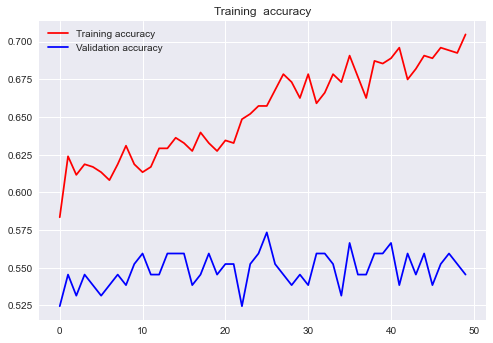

<Figure size 576x396 with 0 Axes>

In [132]:
acc = history.history['accuracy']
validataion_acc = history.history['val_accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, validataion_acc, 'b', label='Validation accuracy')
plt.title('Training  accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Summary
Best results achieved with RandomForest Classifier

## Generating test resutls for upload

In [309]:
testdata = pd.read_csv('test.csv')
testdata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [310]:
del testdata['Cabin']

In [311]:
testdata['Sex_cat'] = testdata.Sex.astype('category').cat.codes
testdata['Embarked_cat'] = testdata.Embarked.astype('category').cat.codes
columns_not_including = ['Name', 'Ticket', 'Embarked', 'Sex']
testdata = testdata.drop(columns_not_including, axis = 1)

In [312]:
testdata.fillna(testdata['Age'].mean(), inplace = True)


In [202]:
testdata.loc[:, list(testdata.columns[1:])]    

,Pclass,Age,SibSp,Parch,Fare,Sex_cat,Embarked_cat
0,3,34.50000,0,0,7.8292,1,1
1,3,47.00000,1,0,7.0000,0,2
2,2,62.00000,0,0,9.6875,1,1
3,3,27.00000,0,0,8.6625,1,2
4,3,22.00000,1,1,12.2875,0,2
...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,2
414,1,39.00000,0,0,108.9000,0,0
415,3,38.50000,0,0,7.2500,1,2
416,3,30.27259,0,0,8.0500,1,2


In [203]:
testdata['Survived'] = rf.predict(testdata.loc[:, list(testdata.columns[1:])])

In [204]:
output = testdata[['PassengerId', 'Survived']]

In [206]:
output.to_csv('submission.csv', index = False)

# More ML models to improve accuracy

### SGD Classifier

In [249]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'log', max_iter = 100).fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, y_pred_sgd, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.74      0.76      0.75        78
           1       0.70      0.68      0.69        65

    accuracy                           0.72       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.72      0.72      0.72       143



In [253]:
from sklearn.linear_model import SGDClassifier
param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'max_iter': [50, 100, 500, 1000, 2000]
             }

sgd_grid = SGDClassifier()
grid_search = GridSearchCV(estimator = sgd_grid, param_grid = param_grid, cv = 3, verbose = 1)

In [254]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 525 candidates, totalling 1575 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Tola\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tola\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tola\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tola\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 1000],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'max_iter': [50, 100, 500, 1000, 2000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=1)

In [255]:
grid_search.best_params_

{'alpha': 0.1, 'loss': 'modified_huber', 'max_iter': 2000, 'penalty': 'l1'}

In [256]:
best_grid = grid_search.best_estimator_

In [259]:
y_pred_sgd_grid = best_grid.predict(X_test)
print(classification_report(y_test, y_pred_sgd_grid, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.68      0.91      0.78        78
           1       0.82      0.48      0.60        65

    accuracy                           0.71       143
   macro avg       0.75      0.69      0.69       143
weighted avg       0.74      0.71      0.70       143



<BarContainer object of 7 artists>

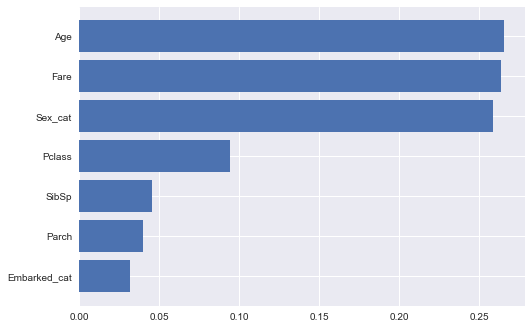

In [296]:
features = pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns)), columns =['Values', 'Features'])
plt.barh(features.Features, features.Values)


In [305]:
rf_ch = RandomForestClassifier(criterion='gini',
                            n_estimators=1750,
                            max_depth=7,
                            min_samples_split=6,
                            min_samples_leaf=6,
                            max_features='auto',
                            oob_score=True,
                            random_state=42,
                            n_jobs=-1,
                            verbose=0).fit(X_train, y_train)

In [306]:
y_pred_rf_ch = rf_ch.predict(X_test)

In [307]:
print(classification_report(y_test, y_pred_rf_ch, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.74      0.96      0.83        78
           1       0.93      0.58      0.72        65

    accuracy                           0.79       143
   macro avg       0.83      0.77      0.78       143
weighted avg       0.82      0.79      0.78       143



In [313]:
testdata['Survived'] = rf_ch.predict(testdata.loc[:, list(testdata.columns[1:])])

In [314]:
output = testdata[['PassengerId', 'Survived']]

In [315]:
output.to_csv('submission2.csv', index = False)